In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Complete WorkFlow

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


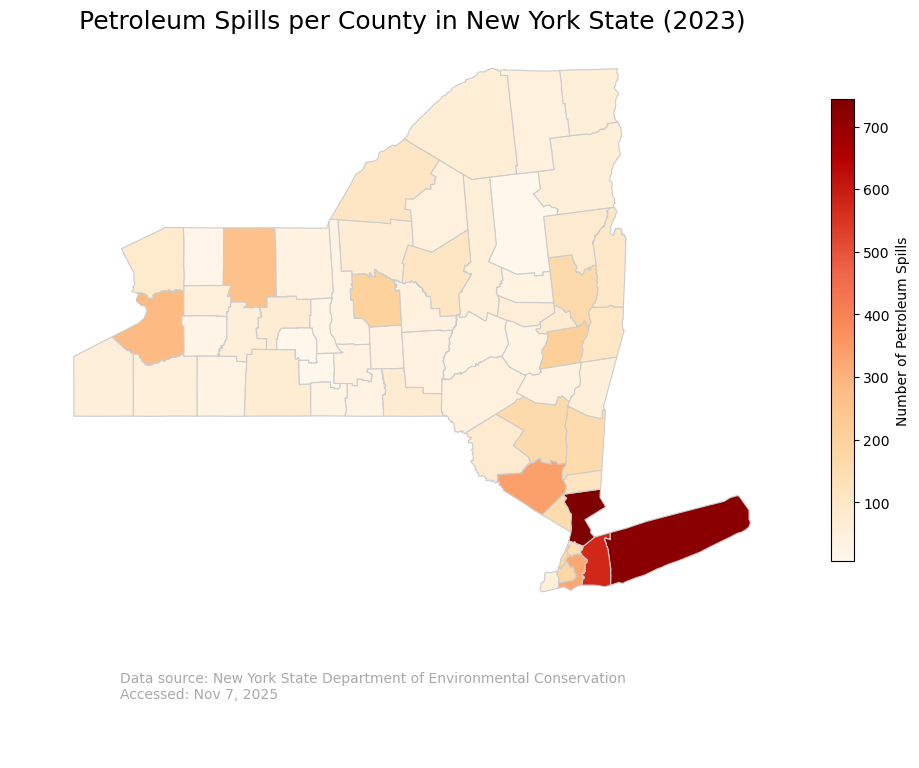

In [2]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# To remove an error message to produce map
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Importing CSV from Oil Spills
fp = os.path.join('data','Spill_Incidents_20251103.csv')
spills = pd.read_csv(fp)

# Importing Shapefile from US Census Bureau
fp = os.path.join('data','tl_2023_us_county.shp')
counties = gpd.read_file(fp)

# Make headers all lowercase, remove spaces and replace with underscore
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

#Convert date columns to datetime
date_cols = ['spill_date', 'received_date', 'close_date']
for col in date_cols:
    spills[col] = pd.to_datetime(spills[col], errors='coerce')
    
# Select petroleum spills between Jan 1, 2023 and Oct 31, 2023
petr_23 = spills[
    
    (spills['material_family'] == 'Petroleum') &
    (spills['spill_date'] >= '2023-01-01') &
    (spills['spill_date'] <= '2023-10-31')
]

# Create new dataframe of Country and Number of Spills
spills_per_county = (
    #Grouping by 'Country' and counting 'spill_number'
    petr_23.groupby('county')['spill_number']
    .count()
)

# Resetting index
spills_per_county =  spills_per_county.reset_index(name='n_spills')

# Clean column names for counties shapefile
counties.columns = (
    counties.columns
    # Remove spaces
    .str.strip()
    # Lowercase all names
    .str.lower()  
    # Replace spaces with underscores
    .str.replace(' ', '_'))       

# Select the states of New York, using statefp
ny_counties = counties[counties['statefp'] == '36']

# Verify 'St Lawrence' on spills per county 
spills_per_county[spills_per_county['county'] == 'St Lawrence']
# Replace value
spills_per_county['county'] = spills_per_county['county'].replace({'St Lawrence':'St. Lawrence'})

# Lowercase values in county column
spills_per_county['county'] = spills_per_county['county'].str.lower()
ny_counties['name'] = ny_counties['name'].str.lower()
# Renaming column on ny_counties to match spills per county
ny_counties = ny_counties.rename(columns={'name': 'county'})

# Perform the inner join and overwrite ny_counties
ny_counties = ny_counties.merge(
    spills_per_county[['county', 'n_spills']],
    on='county',
    how='inner')

# Increment Niagara
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# MAP
# Set up figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the choropleth
ny_counties.plot(
    # Column to color by
    column='n_spills', 
    # Color map (Orange-Red)
    cmap='OrRd',  
    # County boundaries width
    linewidth=0.8, 
    # County boundaries color (gray)
    edgecolor='0.8', 
    # Show legend
    legend=True,               
    legend_kwds={'label': "Number of Petroleum Spills",  # Title
                 # Size of scale bar
                 'shrink': 0.6,
                 # Location of scale
                 'orientation': 'vertical'},
    # Assinging it back to the fig, ax
    ax=ax)

# Axes
ax.axis('off')

# Title
ax.set_title("Petroleum Spills per County in New York State (2023)", fontdict={'fontsize': 18}, pad=10)

# Add annotation with source and access date
plt.annotate(
    "Data source: New York State Department of Environmental Conservation \nAccessed: Nov 7, 2025",
    # xy = location of annotation text
    xy=(0.1, 0.07), 
    xycoords='figure fraction',
    fontsize=10, color='darkgrey')

# Show plot
plt.show()

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/marietolteca00/eds220-hwk3.git

- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

Oil spill data: New York State Department of Environmental Conservation.[https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data]. Date of Access: November 03, 2025.

TIGER shapefile: United States Census Bureau. https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html. Date of Access: November 03, 2025.

## 3. Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [ ]:
# Importing CSV from Oil Spills
fp = os.path.join('data','Spill_Incidents_20251103.csv')
spills = pd.read_csv(fp)

# Importing Shapefile from US Census Bureau
fp = os.path.join('data','tl_2023_us_county.shp')
counties = gpd.read_file(fp)


<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [ ]:
#a. Check the dataframe's head
spills.head()

In [ ]:
#b. Check the data types of the columns
print(spills.dtypes)

In [ ]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()
spills['Program Facility Name'].unique()

In [ ]:
#d. Check the unique values in the `county` column
spills['County'].unique()
spills.nunique()
spills.isna().sum()

e.
From the spills dataframe, I observed that it includes various details about each incident, such as the location of the spill, the units involved, and the type of material (both by family and specific name). The data exploration also revealed that most columns are stored as object types, and notably, the date values are not yet in a proper datetime format, which may require conversion for time-based analysis.
For the counties TIGER shapefile, most of the attributes are stored as object types, except for the land and water area fields, which are stored as integers. This indicates that while most information is categorical or descriptive, a few columns contain numerical data suitable for quantitative analysis.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [ ]:
# Make headers all lowercase, remove spaces and replace with underscore
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

In [ ]:
#Convert date columns to datetime
date_cols = ['spill_date', 'received_date', 'close_date']
for col in date_cols:
    spills[col] = pd.to_datetime(spills[col], errors='coerce')
    
# Confirming Data Types Changed
spills.head()

In [ ]:
counties.head()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [ ]:
#print(spills.dtypes)
#counties.dtypes
spills.head()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [ ]:
# Checking values on this 'program_facility_name'
spills['program_facility_name'].unique()

In [ ]:
# Select petroleum spills between Jan 1, 2023 and Oct 31, 2023
petr_23 = spills[
    
    (spills['material_family'] == 'Petroleum') &
    (spills['spill_date'] >= '2023-01-01') &
    (spills['spill_date'] <= '2023-10-31')
]

# Viewing spill date
petr_23.head()
# Viewing close date
petr_23.tail()
print(petr_23.shape)

# Make sure Tuscarora is in for a problem ahead!
petr_23[petr_23['county'].str.contains('Tuscarora', case=False, na=False)]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [ ]:
# View datetime for print statement
petr_23.spill_date.dt.year.unique()
#petr_23['spill_date'].unique

print(f"petr_23 has data from the year: {petr_23.spill_date.dt.year.unique()}, and from the dates of {petr_23['spill_date'].min()} to {petr_23['spill_date'].max()}")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [ ]:
# Assert all rows in 'material_family' are 'Petroleum'
# Function: assert (CONDITION).all(), "ERROR MESSAGE IF FALSE"
assert (petr_23['material_family'] == 'Petroleum').all(), "Non-petroleum spills found in petr_23" #need to inclue .all() if not error message


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [ ]:
# Viewing dataframe
petr_23.head(2)
petr_23.dtypes

In [ ]:
# Create new dataframe of Country and Number of Spills
spills_per_county = (
    #Grouping by 'Country' and counting 'spill_number'
    petr_23.groupby('county')['spill_number']
    .count()
)

# Resetting index
spills_per_county =  spills_per_county.reset_index(name='n_spills')

# Printing dataframe
spills_per_county.head()

# Make sure it exist for problem ahead
spills_per_county[spills_per_county['county'].str.contains('Tuscarora', case=False, na=False)]


In [ ]:
grader.check("q5d")

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

Throughout my preliminary data exploratory, I was able to look at the top 5 rows that included the all the columns to get familiar with the data. I also looked at the data types that are in this dataset. After I was curious to see what CRS it is on, aswell as if it is projected or geographic. Lastly, I plotted the data to visually see it.

In [ ]:
# a View first 5 rows
counties.head()

In [ ]:
# b Look at dtypes
print(counties.dtypes)

In [ ]:
# c View CRS and projection
print('CRS: ', counties.crs)
# Explore CRS
print(f"ellipsoid: {counties.crs.ellipsoid}")
print(f"datum: {counties.crs.datum}")
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {counties.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {counties.crs.is_projected}")

counties.geom_type

In [ ]:
# d Plot counties
counties.plot()

Throughout my preliminary data exploratory, I was able to look at the top 5 rows that included the all the columns to get familiar with the data. I also looked at the data types that are in this dataset. After I was curious to see what CRS it is on, aswell as if it is projected or geographic. Lastly, I plotted the data to visually see it.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [ ]:
# Clean column names for counties shapefile
counties.columns = (
    counties.columns
    # Remove spaces
    .str.strip()
    # Lowercase all names
    .str.lower()  
    # Replace spaces with underscores
    .str.replace(' ', '_'))       


In [ ]:
# Check counties geom type
counties.geom_type

In [ ]:
# View dataframe
counties.head(2)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [ ]:
# Select the states of New York, using statefp
ny_counties = counties[counties['statefp'] == '36']


In [ ]:
# Plot for only NY counties
ny_counties.plot(color = "darkorchid")
plt.title('Counties in New York') # Set Title

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [ ]:
# Print names of ny_countries
ny_counties['name'].values

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [ ]:
# Print names of spills per county
spills_per_county['county'].values

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [ ]:
# Compare the arrays of county names in spills but not the full dataframe
diff_names_spills = list(np.setdiff1d(
    spills_per_county['county'],
    ny_counties['name']
))

diff_names_spills

In [ ]:
print(len(diff_names_spills))


In [ ]:
grader.check("7Ac")

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [ ]:
# Counties in ny_counties but not in spills_per_county
diff_names_ny = list(np.setdiff1d(
    ny_counties['name'].unique(),        # all NY counties from TIGER
    spills_per_county['county'].unique() # counties with spills
))

# Check the result
print(diff_names_ny)
print(len(diff_names_ny))
diff_names_ny

In [ ]:
grader.check("7Ad")

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [ ]:
# e. Number of spills in Tuscarora Indian Reservation
spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation'] # none

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [ ]:
# Verify 'St Lawrence' on spills per county 
spills_per_county[spills_per_county['county'] == 'St Lawrence']
# Replace value
spills_per_county['county'] = spills_per_county['county'].replace({'St Lawrence':'St. Lawrence'})
#Verify change has been made
spills_per_county[spills_per_county['county'] == 'St. Lawrence']


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [ ]:
# Lowercase values in county column
spills_per_county['county'] = spills_per_county['county'].str.lower()
ny_counties['name'] = ny_counties['name'].str.lower()
# Renaming column on ny_counties to match spills per county
ny_counties = ny_counties.rename(columns={'name': 'county'})
# Verify column name change
ny_counties.head(2)


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [ ]:
# Perform the inner join and overwrite ny_counties
ny_counties = ny_counties.merge(
    spills_per_county[['county', 'n_spills']],
    on='county',
    how='inner'
)


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [ ]:
# Verifying Niagra is in the ny_counties dataframe
ny_counties[ny_counties['county'] == 'niagara']
# Increment Niagara
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1
# Verify output
ny_counties[ny_counties['county'] == 'niagara']

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



In [1]:
# Set up figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the choropleth
ny_counties.plot(
    # Column to color by
    column='n_spills', 
    # Color map (Orange-Red)
    cmap='OrRd',  
    # County boundaries width
    linewidth=0.8, 
    # County boundaries color (gray)
    edgecolor='0.8', 
    # Show legend
    legend=True,               
    legend_kwds={'label': "Number of Petroleum Spills",  # Title
                 # Size of scale bar
                 'shrink': 0.6,
                 # Location of scale
                 'orientation': 'vertical'},
    # Assinging it back to the fig, ax
    ax=ax)

# Axes
ax.axis('off')

# Title
ax.set_title("Petroleum Spills per County in New York State (2023)", fontdict={'fontsize': 18}, pad=10)

# Add annotation with source and access date
plt.annotate(
    "Data source: New York State Department of Environmental Conservation \nAccessed: Nov 7, 2025",
    # xy = location of annotation text
    xy=(0.1, 0.07), 
    xycoords='figure fraction',
    fontsize=10, color='darkgrey')

# Show plot
plt.show()

NameError: name 'plt' is not defined

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

The map was created by merging petroleum spill data from New York State with the 2023 TIGER/Line counties shapefile from the U.S. Census Bureau. Before merging, I converted date columns to datetime format and filtered the spills to those that occurred between January 1 and October 31, 2023. Column names were cleaned and standardized to ensure a proper join on county names. The datasets were merged using an inner join, linking county geometries with the number of petroleum spills. The resulting geospatial dataframe was visualized as a choropleth map using Matplotlib and GeoPandas, showing how spill frequency varies by county.

**Takeaways:** 
- Using function setdiff1d(), and merging two dataframes together 
- Spill counts were higher in urbanized and industrial regions.
- County name (“St Lawrence” switched to “St. Lawrence”) was corrected.
- The Tuscarora Indian Reservation spill was reassigned to Niagara County to maintain consistency with the shapefile boundaries.

## Complete workflow

**STILL WORKING ON THIS**

Collect all the relevant code into a **new notebook** titled `hwk3-task1-spills-COMPLETE-YOURLASTNAME.ipynb`. This notebook should have two sections:the a single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.



**From last HW:**

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [ ]:
grader.check_all()